<a href="https://colab.research.google.com/github/azecoder/ML/blob/master/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import math
import numpy as np

Mounted at /gdrive


In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

In [28]:
filepath = '/gdrive/My Drive/Projects/ML/ML-CUP19-TR.csv'

# import pandas as pd
import numpy as np

# dataset = pd.read_csv(filepath, sep=',', skiprows=7, header=None)
dataset = np.loadtxt(filepath, skiprows=7, delimiter=",")
# dataset = dataset.drop(dataset.columns[[0]], axis=1)

print(dataset[:2,:])

[[ 1.00000000e+00  4.03680338e-01 -1.26330528e+00 -1.40577657e+00
  -1.20439054e+00 -1.15093277e+00 -1.59757513e-02  1.05029534e+00
  -1.34592218e+00  4.03672346e-01 -1.15094796e+00 -1.59814365e-02
  -5.00362665e-01 -5.00365298e-01 -1.20438243e+00  1.22521344e+00
  -1.34592131e+00  1.05031710e+00 -1.40578687e+00 -1.26331972e+00
   1.22520306e+00  4.13091198e+00 -2.88270840e-01]
 [ 2.00000000e+00 -9.85473912e-01  1.49528474e+00 -9.47413475e-01
   5.20832049e-01  1.16691012e-01 -1.11831830e+00 -1.22187380e+00
   1.57202260e+00 -9.85459895e-01  1.16686048e-01 -1.11830737e+00
  -9.71660016e-01 -9.71674705e-01  5.20838936e-01 -1.22326646e+00
   1.57202473e+00 -1.22188462e+00 -9.47417106e-01  1.49530232e+00
  -1.22327817e+00  2.94990452e+01 -4.53563461e+00]]


In [29]:
data_x, data_y = dataset[:,1:21], dataset[:,21:23]

print("-- Data X ----------")
print(data_x[:2][:], "\n\n")
print("-- Data Y ----------")
print(data_y[:2][:], "\n\n")

-- Data X ----------
[[ 0.40368034 -1.26330528 -1.40577657 -1.20439054 -1.15093277 -0.01597575
   1.05029534 -1.34592218  0.40367235 -1.15094796 -0.01598144 -0.50036266
  -0.5003653  -1.20438243  1.22521344 -1.34592131  1.0503171  -1.40578687
  -1.26331972  1.22520306]
 [-0.98547391  1.49528474 -0.94741347  0.52083205  0.11669101 -1.1183183
  -1.2218738   1.5720226  -0.98545989  0.11668605 -1.11830737 -0.97166002
  -0.9716747   0.52083894 -1.22326646  1.57202473 -1.22188462 -0.94741711
   1.49530232 -1.22327817]] 


-- Data Y ----------
[[ 4.13091198 -0.28827084]
 [29.49904525 -4.53563461]] 




In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.33, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

print("-- X Train ---------")
print(">> shape:", x_train.shape)
print(x_train[:2][:], "\n\n")

-- X Train ---------
>> shape: (791, 20)
[[-1.04861932  1.49531883 -1.77246799  0.52084534 -0.37626086 -1.32498938
  -1.1022908   1.51479205 -1.04861061 -0.37627588 -1.32499431 -1.16017279
  -1.16017091  0.52082268 -1.22326928  1.51482285 -1.1022798  -1.77246585
   1.49531319 -1.22326698]
 [-1.42745848  1.4953008  -1.31409426  1.17523193 -0.09457126 -0.98050594
  -1.34146017  1.4576103  -1.42748091 -0.09457553 -0.98049453 -0.68888402
  -0.68889292  1.17524774 -1.40243835  1.45758766 -1.3414468  -1.31410599
   1.49530689 -1.40243332]] 




In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.fit_transform(x_val)
y_train_scaled = scaler.fit_transform(y_train)
y_val_scaled = scaler.fit_transform(y_val)
# x_test_scaled = scaler.fit_transform(x_test)

print("-- X Train Scaled ---------")
print(">> shape:", x_train_scaled.shape)
print(x_train_scaled[:2][:], "\n\n")

-- X Train Scaled ---------
>> shape: (791, 20)
[[0.23213592 0.88889299 0.31372853 0.6060597  0.44827725 0.160714
  0.12963168 0.79998998 0.23214001 0.44827478 0.16071577 0.3090919
  0.30909361 0.60605488 0.10909846 0.80000008 0.12962781 0.31373101
  0.88888986 0.1090978 ]
 [0.12499811 0.88888791 0.41176804 0.77272241 0.51724118 0.25000169
  0.05556003 0.78461442 0.12499424 0.5172409  0.25000745 0.4000009
  0.39999994 0.77272717 0.05455016 0.78461    0.0555562  0.41176699
  0.88888808 0.05455011]] 




In [0]:
# from sklearn.linear_model import LinearRegression as lm
# model=lm().fit(x_train_scaled, y_train_scaled)
# y_val_pred = model.predict(x_val_scaled)
# y_val_inverse = scaler.inverse_transform(y_val_pred)

In [0]:
import keras
from keras.models import Sequential
model = Sequential()

# for tensorflow update error
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


from keras.layers import Dense
# model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(100, input_dim=20, activation='relu')) # input [100][20]
# model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid')) # output
# model.compile(loss='categorical_crossentropy',
#               optimizer='sgd',
#               metrics=['accuracy'])
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True))

history = model.fit(x_train_scaled, y_train_scaled, epochs=1000, validation_data=(x_val_scaled, y_val_scaled), batch_size=32, verbose=0)
# y_val_pred = model.predict(x_val_scaled, batch_size=128)
# y_val_inverse = scaler.inverse_transform(y_val_pred, batch_size=32)

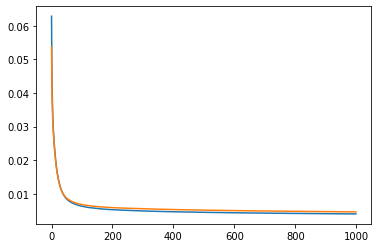

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])